<a href="https://colab.research.google.com/github/bruh-denis/openCV/blob/main/Laba_2/Homework_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

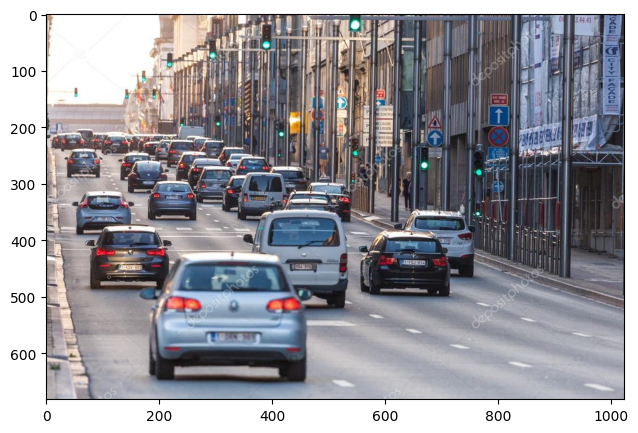

In [9]:
img = cv2.imread("RoadPhoto.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x79834f39f910>)

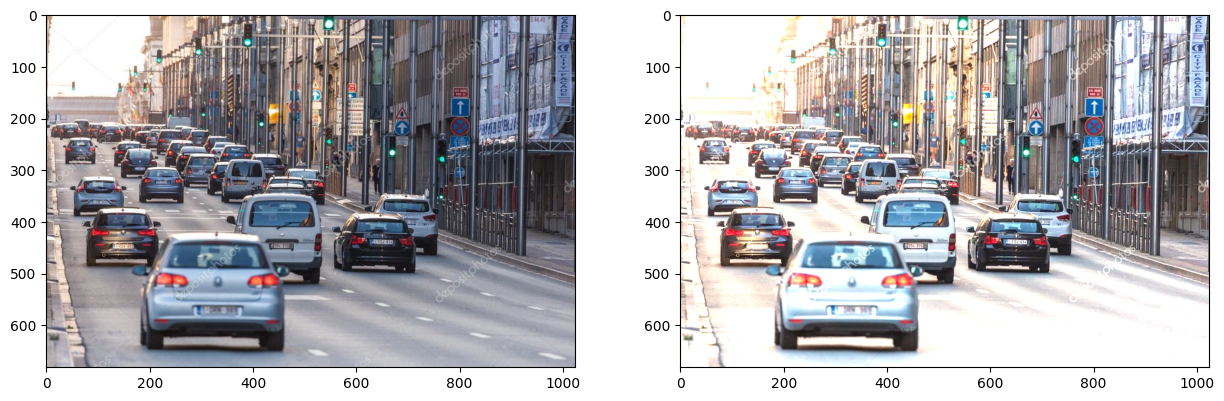

In [10]:
# Define white patch and the coefficients
size_info = img.shape

row, col = size_info[0] - 1, size_info[1] - 1
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x7983022543d0>)

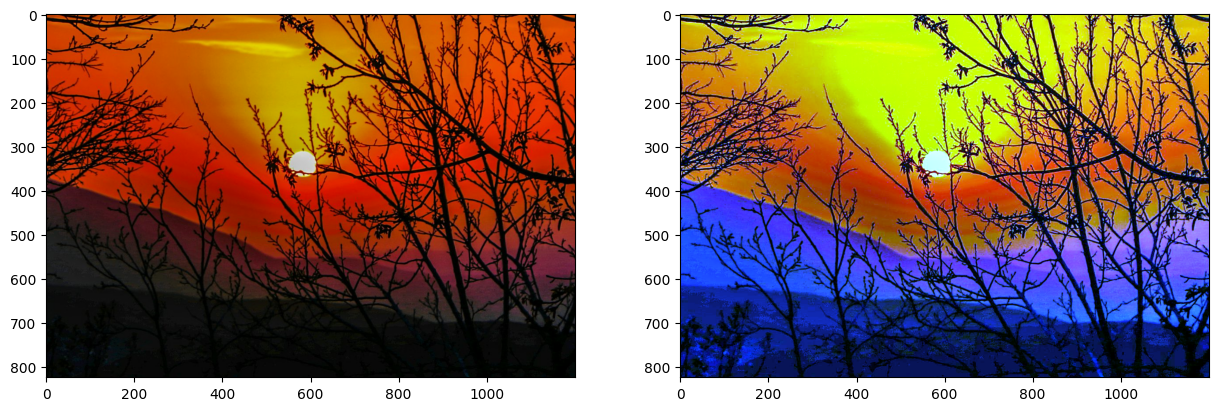

In [19]:
# Load your image
img = cv2.imread("Evning.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[..., 0])
mean_g = np.mean(img[..., 1])
mean_b = np.mean(img[..., 2])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

if mean_r >= mean_g and mean_r >= mean_b:
    kr = 1
    kg = mean_r / mean_g
    kb = mean_r / mean_b
elif mean_g >= mean_r and mean_g >= mean_b:
    kr = mean_g / mean_r
    kg = 1
    kb = mean_g / mean_b
else:
    kr = mean_b / mean_r
    kg = mean_b / mean_g
    kb = 1


balanced = np.zeros_like(img, dtype=np.float32)
balanced[:,:,0] = img[:,:,0] * kr
balanced[:,:,1] = img[:,:,1] * kg
balanced[:,:,2] = img[:,:,2] * kb

# Apply color balancing and generate the balanced image
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

(<Axes: >, <matplotlib.image.AxesImage at 0x79830155c550>)

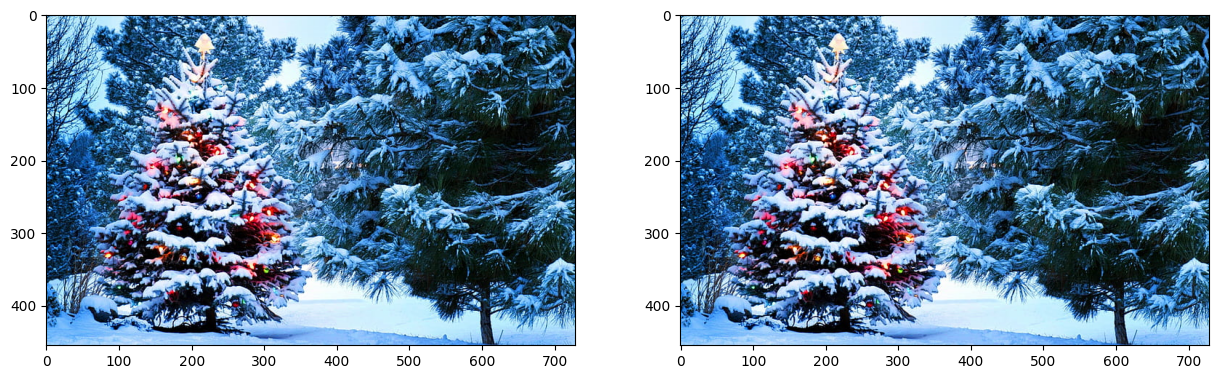

In [25]:
# Load your image
img = cv2.imread("ChristmasTree.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[...,0])
max_g = np.max(img[...,1])
max_b = np.max(img[...,2])

balanced = np.zeros_like(img, dtype=np.float32)
balanced[..., 0] = img[..., 0] * (255.0 / max_r)
balanced[..., 1] = img[..., 1] * (255.0 / max_g)
balanced[..., 2] = img[..., 2] * (255.0 / max_b)

# Apply scale-by-max balancing and generate the balanced image
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)